Project E-commerce Customer Behavior
Dataset: customers.csv and orders.csv
 Goal: Explore customer spending patterns.
Tasks:
	•	Merge both files on customer_id.
	•	Calculate total spent per customer.
	•	Add “High Spender” column (if spent > 100).
	•	📊 Scatter plot: Age vs. Spending.
	•	📊 Bar chart: High spenders per location.


In [5]:
from google.colab import files
uploaded=files.upload()

Saving Customers_Data.csv to Customers_Data.csv


In [6]:
from google.colab import files
uploaded=files.upload()

Saving Orders_Data.csv to Orders_Data.csv


In [9]:
import pandas as pd
df1=pd.read_csv('Customers_Data.csv')
print(df1)

   customer_id     name  age    location
0            1    Alice   25    New York
1            2      Bob   30  California
2            3  Charlie   22       Texas
3            4    David   35     Florida
4            5      Eva   28      Nevada
5            6    Frank   40        Ohio
6            7    Grace   31       Texas
7            8   Hannah   27  California
8            9      Ian   24     Florida
9           10     Jane   29    New York


In [12]:
df2=pd.read_csv('Orders_Data.csv')
print(df2)

    order_id  customer_id  order_date  order_amount
0        101            7  2024-01-01            30
1        102            4  2024-01-16            67
2        103            8  2024-01-31            31
3        104            5  2024-02-15            98
4        105            7  2024-03-01            58
5        106           10  2024-03-16            68
6        107            3  2024-03-31            24
7        108            7  2024-04-15            60
8        109            8  2024-04-30           117
9        110            5  2024-05-15            64
10       111            4  2024-05-30            73
11       112            8  2024-06-14           140
12       113            8  2024-06-29            60
13       114            3  2024-07-14           144
14       115            6  2024-07-29            30
15       116            5  2024-08-13            82
16       117            2  2024-08-28            27
17       118            8  2024-09-12           141
18       119

In [14]:
df_merge=pd.merge(df1,df2,on='customer_id',how='left')
print(df_merge)

    customer_id     name  age    location  order_id  order_date  order_amount
0             1    Alice   25    New York       NaN         NaN           NaN
1             2      Bob   30  California     117.0  2024-08-28          27.0
2             2      Bob   30  California     120.0  2024-10-12          69.0
3             3  Charlie   22       Texas     107.0  2024-03-31          24.0
4             3  Charlie   22       Texas     114.0  2024-07-14         144.0
5             4    David   35     Florida     102.0  2024-01-16          67.0
6             4    David   35     Florida     111.0  2024-05-30          73.0
7             5      Eva   28      Nevada     104.0  2024-02-15          98.0
8             5      Eva   28      Nevada     110.0  2024-05-15          64.0
9             5      Eva   28      Nevada     116.0  2024-08-13          82.0
10            6    Frank   40        Ohio     115.0  2024-07-29          30.0
11            6    Frank   40        Ohio     119.0  2024-09-27 

In [19]:
df_merge['Total_spent'] = df_merge['customer_id'].map(
    df_merge.groupby('customer_id')['order_amount'].sum())
print(df_merge)

    customer_id     name  age    location  order_id  order_date  order_amount  \
0             1    Alice   25    New York       NaN         NaN           NaN   
1             2      Bob   30  California     117.0  2024-08-28          27.0   
2             2      Bob   30  California     120.0  2024-10-12          69.0   
3             3  Charlie   22       Texas     107.0  2024-03-31          24.0   
4             3  Charlie   22       Texas     114.0  2024-07-14         144.0   
5             4    David   35     Florida     102.0  2024-01-16          67.0   
6             4    David   35     Florida     111.0  2024-05-30          73.0   
7             5      Eva   28      Nevada     104.0  2024-02-15          98.0   
8             5      Eva   28      Nevada     110.0  2024-05-15          64.0   
9             5      Eva   28      Nevada     116.0  2024-08-13          82.0   
10            6    Frank   40        Ohio     115.0  2024-07-29          30.0   
11            6    Frank   4

In [27]:
import numpy as np
df_merge['High Spender']=np.where(df_merge['Total_spent']>100,'Yes','No')
print(df_merge)

    customer_id     name  age    location  order_id  order_date  order_amount  \
0             1    Alice   25    New York       NaN         NaN           NaN   
1             2      Bob   30  California     117.0  2024-08-28          27.0   
2             2      Bob   30  California     120.0  2024-10-12          69.0   
3             3  Charlie   22       Texas     107.0  2024-03-31          24.0   
4             3  Charlie   22       Texas     114.0  2024-07-14         144.0   
5             4    David   35     Florida     102.0  2024-01-16          67.0   
6             4    David   35     Florida     111.0  2024-05-30          73.0   
7             5      Eva   28      Nevada     104.0  2024-02-15          98.0   
8             5      Eva   28      Nevada     110.0  2024-05-15          64.0   
9             5      Eva   28      Nevada     116.0  2024-08-13          82.0   
10            6    Frank   40        Ohio     115.0  2024-07-29          30.0   
11            6    Frank   4

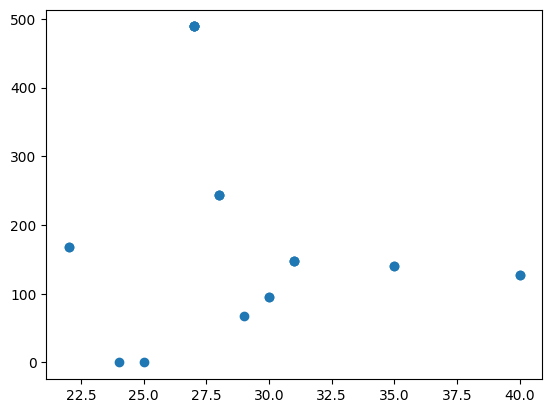

In [21]:
import matplotlib.pyplot as plt
Age=df_merge['age']
Spending=df_merge['Total_spent']
plt.scatter()

<BarContainer object of 5 artists>

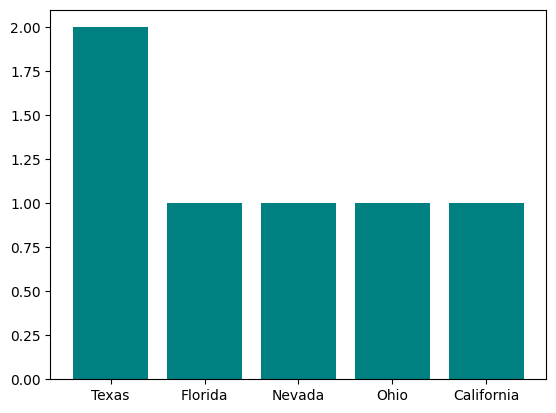

In [34]:
high_spenders = df_merge[df_merge['High Spender'] == 'Yes']

# Optional: remove duplicate customer IDs if multiple orders
high_spenders_unique = high_spenders.drop_duplicates('customer_id')

# Count high spenders per location
location_counts = high_spenders_unique['location'].value_counts()

# Plot bar chart
plt.bar(location_counts.index, location_counts.values, color='teal')